In [2]:
import os 
import nibabel as nb 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import mpl_toolkits.mplot3d
%matplotlib inline


In [3]:
comp_file_01 = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'
comp_file_02 = '/data/pt_mar006/subjects_group/mni3_component_2_reverse.nii.gz'
comp_file_03 = '/data/pt_mar006/subjects_group/mni3_component_3_reverse.nii.gz'

image_mask = os.path.join('/data/pt_mar006/subjects_group',
                          'mni3_rest_gm_mask.nii.gz')

gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]

comp_01     = np.array(nb.load(comp_file_01).get_data())
comp_02     = np.array(nb.load(comp_file_02).get_data())
comp_03     = np.array(nb.load(comp_file_03).get_data())

cmp_01_array = comp_01[x,y,z]
cmp_02_array = comp_02[x,y,z]
cmp_03_array = comp_03[x,y,z]

In [4]:
df = pd.DataFrame(columns=['e1', 'e2', 'e3'])

df['e1'] = cmp_01_array
df['e2'] = cmp_02_array 
df['e3'] = cmp_03_array 

## paired gradients

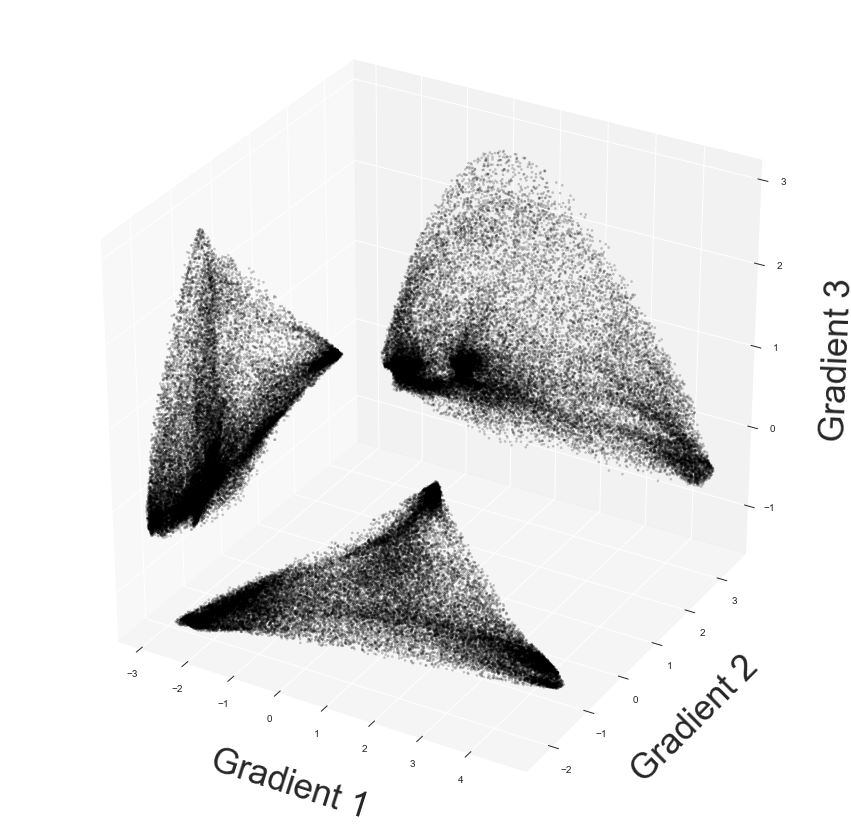

In [5]:
figure = plt.figure(figsize=(15,15), facecolor='w')
ax     = figure.gca(projection='3d')
ax.patch.set_facecolor('white')

xLabel = ax.set_xlabel('\nGradient 1', linespacing=3.2, fontsize=35)
yLabel = ax.set_ylabel('\nGradient 2', linespacing=3.1, fontsize=35)
zLabel = ax.set_zlabel('\nGradient 3', linespacing=3.4, fontsize=35)

ax.set_xlim([np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5])
ax.set_ylim([np.min(df['e2']) - 0.5, np.max(df['e2']) + 0.5]) 
ax.set_zlim([np.min(df['e3']) - 0.5, np.max(df['e3']) + 0.5])

vecLen = len(df['e1'])
cutx   = np.min(df['e1']) - 0.5
cuty   = np.max(df['e2']) + 0.5
cutz   = np.min(df['e3']) - 0.5

ax.scatter(df['e1'], df['e2'], np.ones(vecLen)*cutz,
           s = 20,
           c = 'k',
           alpha = 0.2,
           marker = '.',)

ax.scatter(df['e1'],  np.ones(vecLen)*cuty, df['e3'],
           s = 20,
           c = 'k',
           alpha = 0.2,
           marker = '.',)

ax.scatter(np.ones(vecLen)*cutx, df['e2'],  df['e3'],
           s = 20,
           c = 'k',
           alpha = 0.2,
           marker = '.',)

## get lesion distribution

In [6]:
list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()

# to sum all binarized lesion files
data_dir = '/data/pt_mar006/subjects_masks/'
les_nam  = 'lesion_mask_mni_dilated.nii.gz'

# create template array at mni space 
mni_dir = '/data/pt_mar006/subjects_group/'
mni_3mm    = os.path.join(mni_dir, 'MNI152_T1_3mm_brain.nii.gz')
mni_affine = nb.load(mni_3mm).get_affine()

A  = np.zeros(nb.load(mni_3mm).get_data().shape)

for subject_id in subject_list:
    tmp_file = os.path.join(data_dir, subject_id, les_nam)
    tmp = nb.load(tmp_file).get_data()  
    A  += tmp

print A.shape
print A.min(), A.max()

number_of_patients = 28 
A = A / number_of_patients    
print A.min(), A.max()

img_tmp_A  = nb.Nifti1Image(A, mni_affine)
name_tmp_A = os.path.join(mni_dir, 'lesions_sum_wholebrain_prop_dilated.nii.gz')
nb.save(img_tmp_A, name_tmp_A)


/data/u_bayrak_software/anaconda2/envs/viz27/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if sys.path[0] == '':


(61, 73, 61)
0.0 6.0
0.0 0.21428571428571427


In [7]:
lesFile= '/data/pt_mar006/subjects_group/lesions_sum_wholebrain_prop_dilated.nii.gz'

image_mask = os.path.join('/data/pt_mar006/subjects_group',
                          'mni3_rest_gm_mask.nii.gz')

gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]

les_distr = np.array(nb.load(lesFile).get_data())
les_array = les_distr[x,y,z]
print len(les_array), les_array.min(), les_array.max()

33327 0.0 0.21428571428571427


In [8]:
index = (np.where(les_array != 0))
A = np.array(df['e1'])
B = np.array(df['e2'])
C = np.array(df['e3'])

## lesioned voxels mapped along gradients

[Text(1,0,'3.6%'),
 Text(1,0,'7.1%'),
 Text(1,0,'10.7%'),
 Text(1,0,'14.3%'),
 Text(1,0,'17.9%'),
 Text(1,0,'21.4%')]

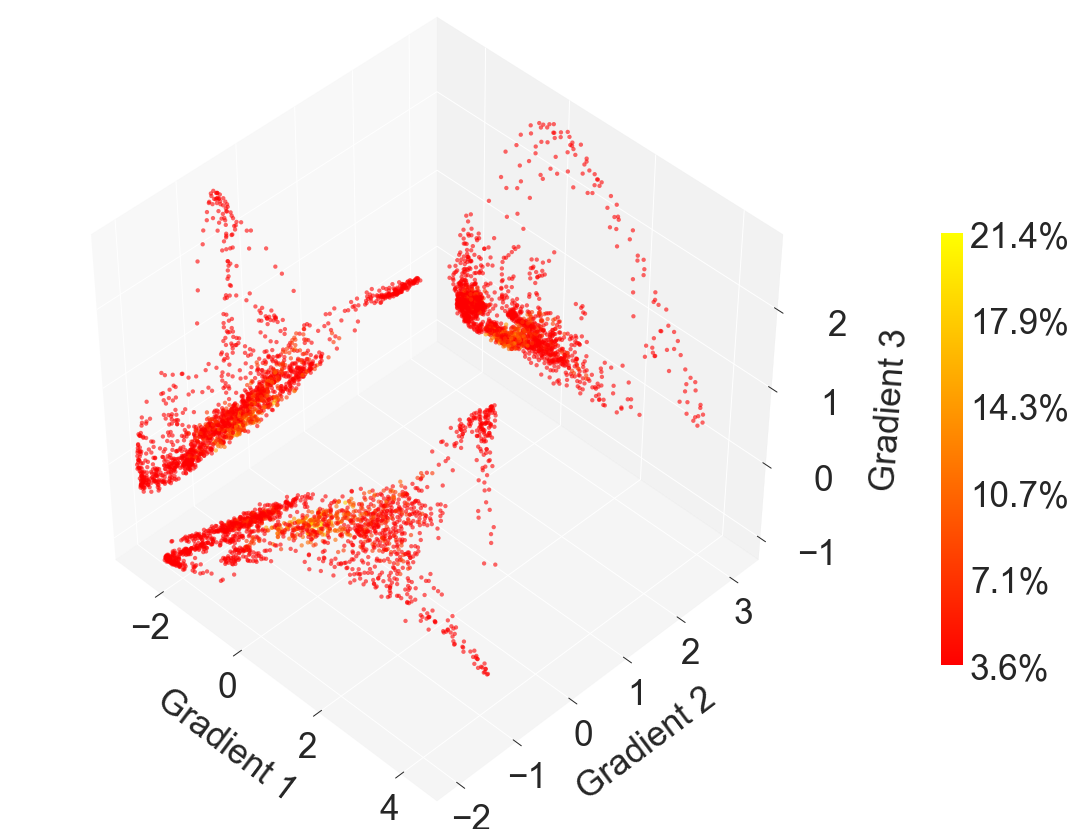

In [9]:
figure = plt.figure(figsize=(15,15))
                    #facecolor='white')

ax     = figure.gca(projection='3d')

ax.patch.set_facecolor('white')

xLabel = ax.set_xlabel('\nGradient 1', linespacing=3.2, fontsize=35)
yLabel = ax.set_ylabel('\nGradient 2', linespacing=3.1, fontsize=35)
zLabel = ax.set_zlabel('\nGradient 3', linespacing=6, rotation=156, fontsize=35)

ax.set_xlim([np.min(df['e1']) - 0.2, np.max(df['e1']) + 0.2])
ax.set_ylim([np.min(df['e2']) - 0.2, np.max(df['e2']) + 0.2]) 
ax.set_zlim([np.min(df['e3']) - 0.2, np.max(df['e3']) + 0.2])

vecLen = len(A[index])
cutx   = np.min(df['e1']) - 0.2
cuty   = np.max(df['e2']) + 0.2
cutz   = np.min(df['e3']) - 0.2


surf = ax.scatter(A[index], B[index], np.ones(vecLen)*cutz,
                   s = 75,
                   c = les_array[index],
                   vmin=les_array[index].min(),
                   vmax=les_array[index].max(),
                   cmap=plt.cm.autumn,
                   alpha = 0.6,
                   linewidth=0,
                   marker = '.',)

surf = ax.scatter(A[index],  np.ones(vecLen)*cuty, C[index],
                   s = 75,
                   c = les_array[index],
                   vmin=les_array[index].min(),
                   vmax=les_array[index].max(),
                   cmap=plt.cm.autumn,
                   alpha = 0.6,
                   linewidth=0,
                   marker = '.')

surf = ax.scatter(np.ones(vecLen)*cutx, B[index], C[index],
                   s = 75,
                   c = les_array[index],
                   vmin=les_array[index].min(),
                   vmax=les_array[index].max(),
                   cmap=plt.cm.autumn,
                   alpha = 0.6,
                   linewidth=0,
                   marker = '.')

#ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.view_init(elev=45, azim=-45)

plt.tick_params(labelsize=35)

ax.tick_params(axis='z', which='major', pad=30)


##################### colorbar

ax_cbar = figure.add_axes([0.99, 0.27, 0.02, 0.4])
norm    = mpl.colors.Normalize(vmin=1. / 28., 
                               vmax=6. / 28.)

bounds        = (np.arange(1,7) / 28.0) # ticks
bounds_perc   = bounds * 100
list_label    = [ j for i,j in enumerate(bounds_perc)]
formattedList = ["%.1f" % member + '%' for member in list_label] #ticklabels

cb    = mpl.colorbar.ColorbarBase(ax_cbar, 
                                  cmap = plt.cm.autumn,
                                  norm=norm,
                                  orientation='vertical',
                                  ticks=bounds,
                                  )

cb.ax.set_yticklabels(formattedList, rotation=0, fontsize=35)



## lesion distribution lying on gradients

In [10]:
lesArray = np.copy(les_array)

lesValues = np.arange(0,7) * (1/28.)

i = 0
for lesValue in lesValues:
    #print lesValue
    index_tmp = np.where(lesArray == lesValue)
    lesArray[index_tmp] = i
    i +=1


In [11]:
lesArray.min(), lesArray.max()

(0.0, 6.0)

In [12]:
index_zeros = np.where(lesArray==0)


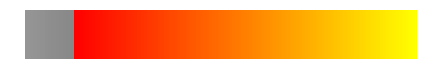

In [13]:
import matplotlib.colors as colors
#colors1 = plt.cm.YlGnBu(np.linspace(0, 1, 128))
first = 32
second = 224

colors1 = plt.cm.Greys(np.linspace(0.5, 0.55, 32))
colors2 = plt.cm.autumn(np.linspace(0, 1, 224))

cols = np.vstack((colors1,colors2))

my_cmap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
BLA = range(num)
for x in range(5):
    BLA = np.vstack((BLA, BLA))

fig, ax = plt.subplots(nrows=1)
ax.imshow(BLA, cmap=my_cmap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

[Text(1,0,'0.0%'),
 Text(1,0,'3.6%'),
 Text(1,0,'7.1%'),
 Text(1,0,'10.7%'),
 Text(1,0,'14.3%'),
 Text(1,0,'17.9%'),
 Text(1,0,'21.4%')]

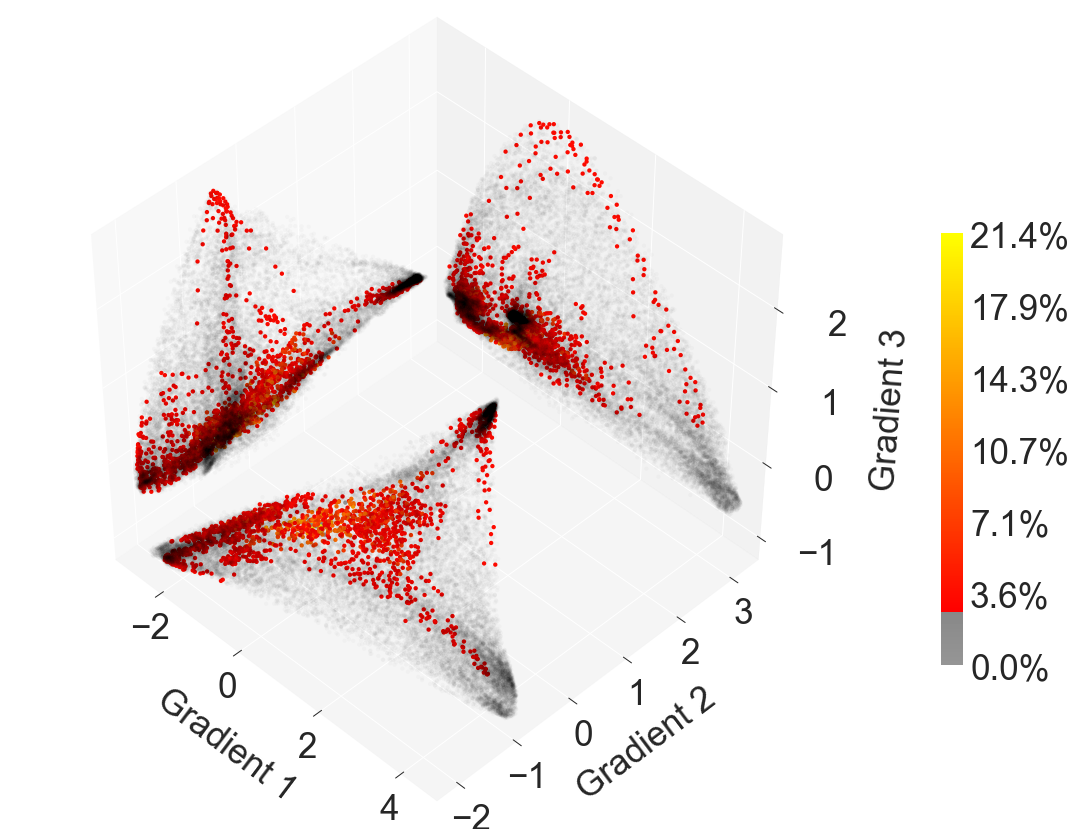

In [14]:
figure = plt.figure(figsize=(15,15),
                    facecolor='white')

ax     = figure.gca(projection='3d')

ax.patch.set_facecolor('white')

xLabel = ax.set_xlabel('\nGradient 1', linespacing=3.2, fontsize=35)
yLabel = ax.set_ylabel('\nGradient 2', linespacing=3.1, fontsize=35)
zLabel = ax.set_zlabel('\nGradient 3', linespacing=6, rotation=156, fontsize=35)

ax.set_xlim([np.min(df['e1']) - 0.2, np.max(df['e1']) + 0.2])
ax.set_ylim([np.min(df['e2']) - 0.2, np.max(df['e2']) + 0.2]) 
ax.set_zlim([np.min(df['e3']) - 0.2, np.max(df['e3']) + 0.2])

vecLen = len(A[index])
cutx   = np.min(df['e1']) - 0.2
cuty   = np.max(df['e2']) + 0.2
cutz   = np.min(df['e3']) - 0.2


surf = ax.scatter(A[index_zeros], B[index_zeros], np.ones(len(A[index_zeros]))*cutz,
            c = 'k', 
            s=75, 
            alpha = 0.02,
            linewidth = 0,
            marker = '.',)     
surf = ax.scatter(A[index], B[index], np.ones(vecLen)*cutz,
            c = lesArray[index], 
            vmin = lesArray.min(),
            vmax = lesArray.max(),
            cmap = my_cmap,
            s=75, 
            alpha = 1.0,
            linewidth = 0,
            marker = '.',)     

surf = ax.scatter(A[index_zeros],  np.ones(len(A[index_zeros]))*cuty, C[index_zeros],
                   s = 75,
                   c = 'k',
                   alpha = 0.02,
                   linewidth=0,
                   marker = '.')
surf = ax.scatter(A[index],  np.ones(vecLen)*cuty, C[index],
                   s = 75,
                   c = les_array[index],
                   vmin=les_array.min(),
                   vmax=les_array.max(),
                   cmap=my_cmap,
                   alpha = 1.0,
                   linewidth=0,
                   marker = '.')

surf = ax.scatter(np.ones(len(A[index_zeros]))*cutx, B[index_zeros], C[index_zeros],
                   s = 75,
                   c = 'k',
                   alpha = 0.02,
                   linewidth=0,
                   marker = '.')
surf = ax.scatter(np.ones(vecLen)*cutx, B[index], C[index],
                   s = 75,
                   c = les_array[index],
                   vmin=les_array.min(),
                   vmax=les_array.max(),
                   cmap=my_cmap,
                   alpha = 1.0,
                   linewidth=0,
                   marker = '.')
#ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.view_init(elev=45, azim=-45)

plt.tick_params(labelsize=35)

ax.tick_params(axis='z', which='major', pad=30)


##################### colorbar

ax_cbar = figure.add_axes([0.99, 0.27, 0.02, 0.4])
norm    = mpl.colors.Normalize(vmin=lesArray.min(), 
                               vmax=lesArray.max())

bounds        = (np.arange(0,7)) # ticks
bounds_perc   = (bounds / 28.) * 100
list_label    = [ j for i,j in enumerate(bounds_perc)]
formattedList = ["%.1f" % member + '%' for member in list_label] #ticklabels

cb    = mpl.colorbar.ColorbarBase(ax_cbar, 
                                  cmap = my_cmap,
                                  norm=norm,
                                  orientation='vertical',
                                  ticks=bounds,
                                  )

cb.ax.set_yticklabels(formattedList, rotation=0, fontsize=35)


In [15]:
bounds_perc

array([ 0.        ,  3.57142857,  7.14285714, 10.71428571, 14.28571429,
       17.85714286, 21.42857143])